# HYPER PARAMETER OPTIMIZATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the dataset
data= pd.read_csv('churn_modelling.csv')

In [3]:
# head of the data
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#describe 
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
#info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


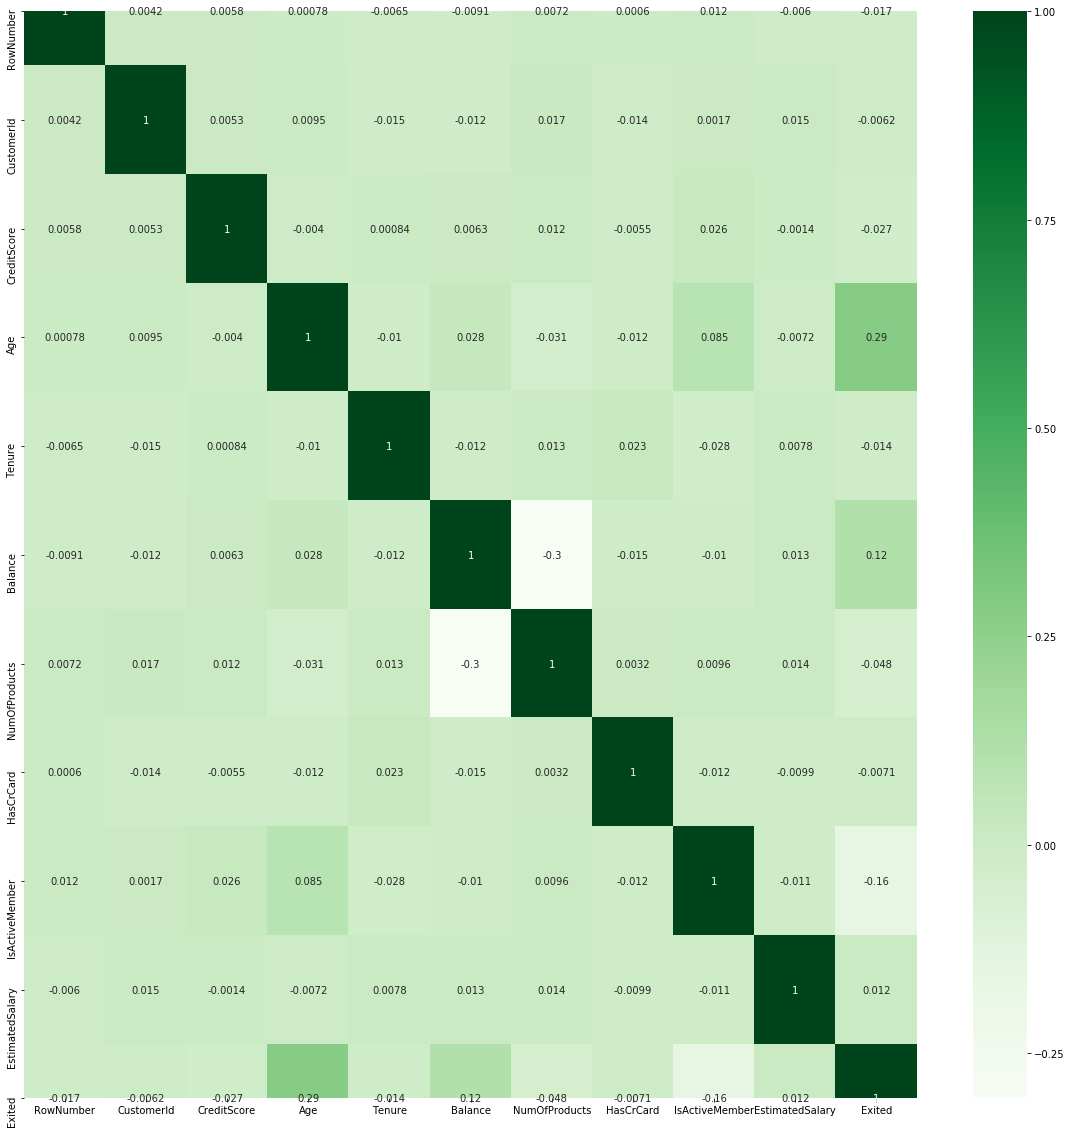

In [6]:
correlation=data.corr()
top_10_features=correlation.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_10_features].corr(), annot=True, cmap="Greens")

In [7]:
#selecting dependent and independent variables
x=data.iloc[:,3:13]
y=data.iloc[:, 13]

In [8]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [9]:
# performing one hot encoding on geography and gender as they are strings
geography=pd.get_dummies(x["Geography"], drop_first=True)
gender=pd.get_dummies(x["Gender"], drop_first=True)
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [10]:
#drop the geography and gender as we have added new columns
X=x.drop(["Geography", "Gender"], axis=1)

In [11]:
X.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57


In [12]:
#now adding one hot coded variables
x=pd.concat([X,geography, gender], axis=1)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [13]:
#hyper parameter optimization
params={
    'learning_rate':[0.05,0.10, 0.15,0.20,0.25,0.30],
    'max_depth':[3, 4, 5, 6, 8, 10, 12, 15],
    'min_child_weight':[1, 3, 5, 7],
    'gamma':[0.0, 0.1, 0.2 , 0.3, 0.4 ],
    'colsamole_bytree':[0.3, 0.4, 0.5 , 0.7 ]
}

In [14]:
import xgboost   # It's a type of ensemble Algorithm
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV  # These are two hyperparameter optimization techniques
classifier=xgboost.XGBClassifier()


In [15]:
#perform randomized search cv
randomisedsearcv=RandomizedSearchCV(classifier, param_distributions=params, n_iter=5, scoring="roc_auc", n_jobs=-1, cv=5, verbose=3)

In [16]:
def timer(start_time=None):   # It will give you the time takken by a program to get executed.
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [17]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
randomisedsearcv.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   31.2s finished



 Time taken: 0 hours 0 minutes and 33.1 seconds.


In [19]:
randomisedsearcv.best_params_

{'min_child_weight': 7,
 'max_depth': 5,
 'learning_rate': 0.05,
 'gamma': 0.0,
 'colsamole_bytree': 0.5}

In [22]:
randomisedsearcv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsamole_bytree=0.5,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0.0, learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [23]:

classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [24]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,x,y,cv=10)


In [25]:
score.mean()

0.8650992200992201